# Lab 1: GMM and EM Algorithm

- Gustavo Adolfo Gutierrez Sabogal
- Manuel Felipe Pineda

In [1]:
%matplotlib inline
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy.stats as stats
from scipy.stats import multivariate_normal as mnormal
from tqdm import tnrange, tqdm_notebook

# EM Algorithm

The log likelihood is described as:


$$
\mathbb{E} [\log p(\mathbf{X}, \mathbf{Z} | \pi, \mu, \Sigma)] = \sum_{n = 1}^{N} \sum_{k = 1}^{K} \gamma(Z_{nk}) \{\log\pi_k + \log \mathcal{N} \left (\mathbf{x}_n \middle | \mu_k, \Sigma_k \right)\}
$$

## Derivative of log likelihood with respect to $\mu_j$

### Useful derivatives:

\begin{align*}
\frac{\partial}{\partial \mu_k}
 \left(\mathcal{N} \left (\mathbf{x}_n \middle | \mu_k, \Sigma_k \right)\right) & = 
\frac{1}{\sqrt{2 \pi \Sigma_k}} \exp {\left( - \frac{1}{2} \frac{(\mathbf{x}_n - \mu_k)^2}{\Sigma_k} \right)} 
\frac {\partial}{\partial \mu_k} \left( - \frac{1}{2} \frac{(\mathbf{x}_n - \mu_k)^2}{\Sigma_k} \right) \\
       & = \mathcal{N} \left (\mathbf{x}_n \middle | \mu_k, \Sigma_k \right) \frac{\partial}{\partial \mu_k}\left( - \frac{1}{2} \frac{(\mathbf{x}_n - \mu_k)^2}{\Sigma_k} \right)
\end{align*}

where:

\begin{equation*}
    \frac {\partial}{\partial \mu_k} \left( - \frac{1}{2} \frac{(\mathbf{x}_n - \mu_k)^2}{\Sigma_k} \right) = \frac{(\mathbf{x}_n - \mu_k)}{\Sigma_k} 
\end{equation*}

Maximizing with respect to $\mu_k$:

\begin{align*}
    \frac{\partial}{\partial \mu_k} & \mathbb{E} \left[\log p(\mathbf{X}, \mathbf{Z} | \pi, \mu, \Sigma)\right] = 0 \\
     & = \frac{\partial}{\partial \mu_k} \left(\sum_{n=1}^{N} \sum_{k=1}^{K} \gamma(Z_{nk}) \left\{ \log\pi_k + \log \mathcal{N}(\mathbf{x}_n | \mu_k, \Sigma_k)\right\}\right) \\
     & = \frac{\partial}{\partial \mu_k} \left(\sum_{n=1}^{N} \gamma(Z_{nk}) \left\{ \log \mathcal{N}(\mathbf{x}_n | \mu_k, \Sigma_k)\right\}\right) \\
     & = \sum_{n=1}^{N} \gamma(Z_{nk}) \frac{\partial}{\partial \mu_k} \left( \left\{ \log \mathcal{N}(\mathbf{x}_n | \mu_k, \Sigma_k)\right\}\right) \\
     & = \sum_{n = 1} ^ {N} \gamma(Z_{nk}) \frac{1}{\mathcal{N} \left (\mathbf{x}_n \middle | \mu_k, \Sigma_k \right)} \frac{\partial}{\partial \mu_k} \left(\mathcal{N} \left (\mathbf{x}_n \middle | \mu_k, \Sigma_k \right)\right)  \\
     & = \sum_{n = 1} ^ {N} \gamma(Z_{nk}) \frac{(\mathbf{X}_n - \mu_k)}{\Sigma_k}  \\
\end{align*}

Finding $\mu_k$ : 


\begin{align*}
    \sum_{n = 1} ^ {N} \gamma(Z_{nk}) \frac{(\mathbf{X}_n - \mu_k)}{\Sigma_k} & = 0 \\
    \sum_{n = 1} ^ {N} \gamma(Z_{nk}) (\mathbf{X}_n - \mu_k) & = 0 \\
    \sum_{n = 1} ^ {N} \gamma(Z_{nk}) \mathbf{X}_n - \sum_{n = 1} ^ {N} \gamma(Z_{nk})  \mu_k & = 0 \\
\end{align*}

Finally:

\begin{align*}
    \mu_k & = \frac{\sum_{n = 1} ^ {N} \gamma(Z_{nk}) \mathbf{X}_n}{\sum_{n = 1} ^ {N} \gamma(Z_{nk}) }
\end{align*}


## Derivative of log likelihood with respect to $\Sigma_j$

### Useful derivatives:

\begin{align*}
\frac{\partial}{\partial \Sigma_j}
 \left(\mathcal{N} \left (\mathbf{x}_n \middle | \mu_j, \Sigma_j \right)\right) & = 
 \frac{\partial}{\partial \Sigma_j} \left( \frac{1}{\sqrt{2 \pi \Sigma_j}} \exp {\left( - \frac{1}{2} \frac{(\mathbf{x}_n - \mu_j)^2}{\Sigma_j} \right)}\right)  \\
    & = - \frac{1}{2 \Sigma_j \sqrt{2 \pi \Sigma_j}} \exp {\left( - \frac{1}{2} \frac{(\mathbf{x}_n - \mu_j)^2}{\Sigma_j} \right)} +  \frac{1}{\sqrt{2 \pi \Sigma_j}} \exp {\left( - \frac{1}{2} \frac{(\mathbf{x}_n - \mu_j)^2}{\Sigma_j} \right)} \left( \frac{1}{2} \frac{(\mathbf{x}_n - \mu_j)^2}{\Sigma_j^2} \right) \\
    & = \mathcal{N} \left (\mathbf{x}_n \middle | \mu_j, \Sigma_j \right) \left(\frac{1}{2} \frac{(\mathbf{x}_n - \mu_j)^2}{\Sigma_j^2} - \frac{1}{2 \Sigma_j} \right)
\end{align*}

-----

\begin{align*}
    \frac{\partial \mathbb{E} [\log p(\mathbf{X}, \mathbf{Z} | \pi, \mu, \Sigma)]}{\partial \Sigma_j} = 0 \\
     & = \frac{\partial }{\partial \Sigma_j} \left(\sum_{n=1}^{N} \sum_{k=1}^{K} \gamma(Z_{nk}) \left\{ \log\pi_k + \log \mathcal{N}(\mathbf{x}_n | \mu_k, \Sigma_k)\right\}\right) \\
     & = \frac{\partial}{\partial \Sigma_j} \left(\sum_{n=1}^{N} \gamma(Z_{nj}) \left\{ \log \mathcal{N}(\mathbf{x}_n | \mu_j, \Sigma_j)\right\}\right) \\
     & = \sum_{n=1}^{N} \gamma(Z_{nj}) \frac{\partial}{\partial \Sigma_j} \left( \log \mathcal{N}(\mathbf{x}_n | \mu_j, \Sigma_j)\right) \\
     & = \sum_{n = 1} ^ {N} \gamma(Z_{nj}) \frac{1}{\mathcal{N} \left (\mathbf{x}_n \middle | \mu_j, \Sigma_j \right)} \frac{\partial }{\partial \Sigma_j} \left(\mathcal{N} \left (\mathbf{x}_n \middle | \mu_j, \Sigma_j \right)\right)  \\
     & = \sum_{n = 1} ^ {N} \gamma(Z_{nj}) \left( \frac{1}{2} \frac{(\mathbf{x}_n - \mu_j)^2}{\Sigma_j^2} - \frac{1}{2 \Sigma_j} \right) \\
\end{align*}

Finding $\Sigma_j$ : 


\begin{align*}
    \sum_{n = 1} ^ {N} \gamma(Z_{nj}) \left( \frac{1}{2} \frac{(\mathbf{x}_n - \mu_j)^2}{\Sigma_j^2} - \frac{1}{2 \Sigma_j} \right) & = 0 \\
    \sum_{n = 1} ^ {N} \gamma(Z_{nj}) \frac{1}{2} \frac{(\mathbf{x}_n - \mu_j)^2}{\Sigma_j^2} - \sum_{n = 1} ^ {N} \gamma(Z_{nj}) \frac{1}{2 \Sigma_j} & = 0 \\
    \frac{1}{2 \Sigma_j^2} \sum_{n = 1} ^ {N} \gamma(Z_{nj}) {(\mathbf{x}_n - \mu_j)^2} & = \frac{1}{2 \Sigma_j} \sum_{n = 1} ^ {N} \gamma(Z_{nj}) \\
\end{align*}

Finally:
\begin{align*}
    {\Sigma_j}  & = \frac{\sum_{n = 1} ^ {N} \gamma(Z_{nj}) {(\mathbf{x}_n - \mu_j)^2}}{\sum_{n = 1} ^ {N} \gamma(Z_{nj})} \\
\end{align*}

## Implementation

In [2]:
color = [(0.763, 0.058, 0.763), (0.058, 0.763, 0.082),
         (0.523, 0.111, 0.666), (0.634, 0.754, 0.223)]

def plot_cov(cov, mu, k):
    fig = plt.figure(0)
    ax = fig.add_subplot(111)
    v, w = np.linalg.eigh(cov)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180.0 * angle / np.pi 
    ellip = mpl.patches.Ellipse(xy=mu,
                                width=v[1],
                                height=v[0],
                                angle=angle)
    ax.add_artist(ellip)
    ellip.set_facecolor(color[k])
    ellip.set_clip_box(ax.bbox)
    return ellip

The following function computes _one_ iteration of the Expectation-Maximization algorithm. It returns new values for the parameters $\pi$, $\mu$ and $\sigma$ being maximized.

In [3]:
def EM_Iter(x, pi, mu, sig):
    # x : dataset
    # pi: initial estimates for the mixture weights
    # mu: initial means for the gaussians
    # sig: inital covariance matrices for the gaussians
    N,D = x.shape
    K = len(pi)
    
    # N: number of observations
    # D: dimensions of each observation
    # K: number of gaussians to mix
    
    # E-step
    # compute wik for all data points and all mixture 
    # components the result is an NxK matrix
    
    Wik = np.zeros((N,K))
    for n in range(N):
        for k in range(K):
            Wik[n,k] = pi[k] * mnormal(mean=mu[k],
                                       cov=sig[k]).pdf(x[n])
    norm = np.transpose(np.sum(Wik,axis=1)[None])
    Wik = Wik / norm
   
    # M-step
    # Compute new values for pi, mu and sigma using wik
    Nk = np.sum(Wik, axis=0)
    
    # Compute a new value for pi
    pi_new = Nk / N
    
    # Compute a new value for mu
    mu_new = np.zeros((K,D))
    for k in range(K):
        s = np.zeros(D)
        for n in range(N):
            s += Wik[n,k] * x[n]
        mu_new[k] = (1 / Nk[k]) * s
    
    # Compute a new value for sigma
    sig_new = [np.zeros((D,D)) for k in range(K)]
    for k in range(K):
        r = np.zeros((D,D))
        for n in range(N):
            t = np.reshape(x[n] - mu_new[k], (D,1))
            r += Wik[n,k] * np.dot(t, t.T)
        sig_new[k] = (1 / Nk[k]) * r
    
    return pi_new, mu_new, sig_new, Wik

Evaluation of the logarithm of the likelihood function. This function returns the value on which termination of EM will be decided.

In [4]:
def loglikelihood(x, pi, mu, sig):
    N,D = x.shape
    K = len(pi)
    lh = 0.0
    for n in range(N):
        s = 0.0
        for k in range(K):
            s += pi[k] * mnormal(mean=mu[k],
                                 cov=sig[k]).pdf(x[n])
        lh += np.log(s)
    return lh       

Actual Expectation-Maximization algorithm implementation.

In [5]:
def EM(x, pi, mu, sig, epsilon=0.00001, iters=100, debug=None):
    lh_old = -1e100
    lh_new = loglikelihood(x, pi, mu, sig)
    N = x.shape[0]
    K = len(pi)
    Wik = np.zeros((N,K))
    for i in tnrange(iters, desc='Optimizing'):
        if abs(lh_old - lh_new) < epsilon:
            break
        pi, mu, sig, Wik = EM_Iter(x,pi,mu,sig)
        if (debug):
            debug(i, lh_new, x, pi, mu, sig, Wik,
                  np.argmax(Wik,axis=1))
        lh_old = lh_new
        lh_new = loglikelihood(x, pi, mu, sig)
    clusters = np.argmax(Wik,axis=1)
    pclusters = Wik
    return mu, sig, lh_new, pi, pclusters, clusters, i

# 2D dataset

Artificial data to test the GMM. We purposely use data in two dimensions to observe how the clustering is performed. 

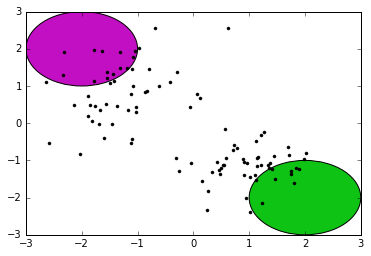

Iteration 0, loglike -381.50100896737933


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


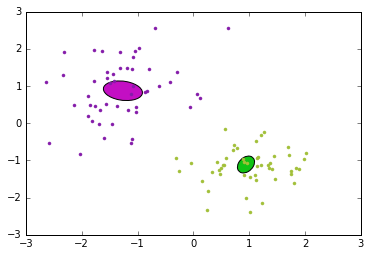

Iteration 1, loglike -257.5106406109371


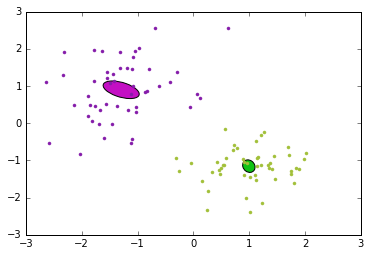

Iteration 2, loglike -252.43329504595783


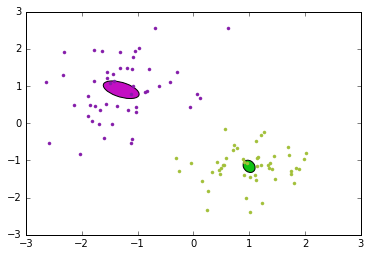

Iteration 3, loglike -252.3699822618718


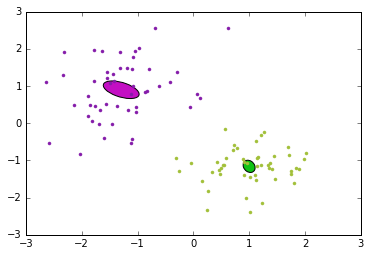

Iteration 4, loglike -252.36989920350445


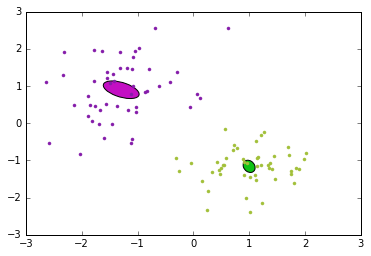


Found! final log likelihood:  -252.369898583


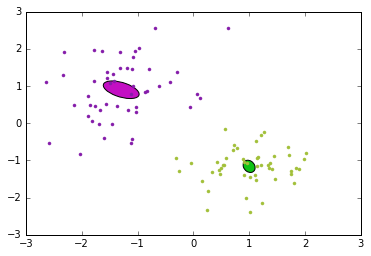

In [6]:
def trace(i, lh, x, pi, mu, sig, wik, cluster):
    K = len(pi)
    print('Iteration {}, loglike {}'.format(i, lh))
    for i in range(K):
        plot_cov(sig[i], mu[i], i)
        plt.plot(x[cluster == i,0], x[cluster == i,1], '.',
                 color=color[(i + 2) % 4])
    plt.show()    

def test_2d(path):
    X = np.loadtxt(path, delimiter=',')
    K = 2
    d = 2
    mu = [[-2, 2], [2, -2]]
    pik = [1.0 / float(K) for x in range(K)]
    sigma = [2.0 * np.eye(d) for x in range(K)]
    
    for i in range(K):
        plot_cov(sigma[i], mu[i], i)
    plt.plot(X[:,0], X[:,1], '.k')
    plt.show()
    
    pik0 = [0.5, 0.5]
    mu, sig, lh, pi, Wik, cluster, _ = EM(X, pik0, mu,
                                          sigma,
                                          debug=trace)
    print ("Found! final log likelihood: ", lh)
    for i in range(K):
        plot_cov(sig[i], mu[i], i)
        plt.plot(X[cluster == i,0], X[cluster == i,1], '.',
                 color=color[(i + 2) % 4])
    plt.show()
    
    
test_2d("data/dataForGMMExample1.csv")

# IRIS dataset

## Read the data

$D = \{x_n \}_{n=1}^N$ is the observed data. $N = 150$ and each $x_n$ has $4$ dimensions. $C_n$ is the class of $x_n$. 

In [7]:
data = pd.read_csv('iris.data', names=['Sepal-length',
                                       'Sepal-width',
                                       'Petal-length',
                                       'Petal-width',
                                       'Class'])
D = data.as_matrix(['Sepal-length',
                    'Sepal-width',
                    'Petal-length',
                    'Petal-width'])
N,d = D.shape
c = data.as_matrix(['Class'])

## Initial values

$K$ is the number of clusters. This is provided by the user.

The unknowns are $\Theta = \pi_k \cup \mu_k \cup \Sigma_k$

- $\pi_k$ probability that a randomly selected $x$ was generated by component $k$. In our case every point might be equally generated by any component. Hence we use $\pi_k = \frac{1}{K}$, $1 \leq k \leq K$. 

  $\sum_{k = 1}^{K} \pi_k = 1$
- $\mu_k$ initial means of the Gaussians in the mixture. Here we randomly select $K$ points from $D$. 
- $\Sigma_k$ for now we use identity matrices of $K \times K$.


In [8]:
K = 3

# pik init
pik = [1.0 / float(K) for x in range(K)]

# muk init
choice = np.random.choice(N,K) # Random indices in the data array
muk = D[choice]                # Random selected data points

# sigk init
sigk = [np.eye(d) for x in range(K)]

In [9]:
_, _, lh, _, pclusters, clusters, convergence = EM(D, pik,
                                                   muk, sigk)
print("Final log likelihood: {}\nConvergence: {} iterations"
      .format(lh, convergence))

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Final log likelihood: -205.06003186193024
Convergence: 18 iterations


### Results

We used GMM to classify the data in the IRIS dataset. For the classification we ignored the **Class** attribute and used GMM with the initial values for the parameters described above. Then we compared the results of GMM with the class information.

In [10]:
GMMclusters = pd.DataFrame(data=clusters,
                           columns=['GMM cluster'])
GMMpclusters = pd.DataFrame(data=pclusters,
                            columns=['G1', 'G2', 'G3'])
classified = pd.concat([data, GMMclusters, GMMpclusters],
                       axis=1)

In [11]:
classified[['GMM cluster', 'Class', 'G1']].groupby(
    ['GMM cluster', 'Class']).agg(['count'])

G1
                            count
GMM cluster Class                
0           Iris-versicolor    47
            Iris-virginica     50
1           Iris-setosa         3
            Iris-versicolor     3
2           Iris-setosa        47

The results of the classification show that the *Iris-setosa* and *Iris-virginica* classes are correctly identified by GMM in groups $0$ and $1$ resp.. Most of the data corresponding to *Iris-versicolor* is classified in group $2$.

In [12]:
df = classified.round({'G1': 2, 'G2':2, 'G3':2})

### K-means for $\mu$ initialization

A possible option to find the initial means of the GMM model is to use Kmeans.

In [13]:
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(D)
labels = k_means.labels_
k_centers = k_means.cluster_centers_

In [14]:
K = 3
# pik (uniform distribution)
pik = [1.0 / float(K) for x in range(K)]
# sigk init
sigk = [np.eye(d) for x in range(K)]

_, _, lh, _, pclusters, clusters, convergence = EM(D,
                                                   pik,
                                                   k_centers,
                                                   sigk)
print("Log-likelihood: {}\nConvergence: {} iterations"
      .format(lh, convergence))

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Log-likelihood: -180.99696001118346
Convergence: 26 iterations


In [15]:
GMMclusters = pd.DataFrame(data=clusters,
                           columns=['GMM-kmeans cluster'])
classified = pd.concat([data, GMMclusters], axis=1)

classified[['GMM-kmeans cluster', 'Class',
            'Sepal-length']].groupby(['GMM-kmeans cluster',
                                      'Class']).agg(['count'])

Sepal-length
                                          count
GMM-kmeans cluster Class                       
0                  Iris-versicolor           45
1                  Iris-setosa               50
2                  Iris-versicolor            5
                   Iris-virginica            50

Using K-means to initialize the means of the GMM model does impact the convergence of EM on the IRIS dataset. This might be explained from the processing and clustering performed by K-means. However, this assertion needs to be studied with other datasets. Additionally, when centers are initialized using K-means the result is the same across several executions. That does not happens when initializing the means by using randomly chosen points of the dataset. 